In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [6]:
df = pd.read_csv('fbpac-ads-en-US.csv')

In [7]:
df = df.sample(frac=1.0)
df = df.reset_index()
train_data = df.loc[0:9]
test_data = df.loc[10:19]
train_data.shape
test_data.shape

(10, 25)

In [8]:
train_data = train_data.drop(['id', 'html', 'title', 'message', 'thumbnail', 'created_at', 'updated_at', 'images', 'targeting', 
                'suppressed', 'targets', 'advertiser', 'entities', 'page', 'lower_page', 'targetings', 'paid_for_by',
                'targetedness', 'listbuilding_fundraising_proba', 'index', 'lang', 'impressions'], axis=1)

In [9]:
test_data = test_data.drop(['id', 'html', 'title', 'message', 'thumbnail', 'created_at', 'updated_at', 'images', 'targeting', 
                'suppressed', 'targets', 'advertiser', 'entities', 'page', 'lower_page', 'targetings', 'paid_for_by',
                'targetedness', 'listbuilding_fundraising_proba', 'index', 'lang', 'impressions'], axis=1)

In [10]:
numeric_features = train_data.dtypes[train_data.dtypes != 'object'].index
train_data[numeric_features] = train_data[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
train_data[numeric_features] = train_data[numeric_features].fillna(0)
train_data

,political,not_political,political_probability
0,0.00000,0.0,0.387933
1,-1.06066,0.0,-2.816385
2,0.00000,0.0,0.391912
3,0.00000,0.0,-0.059998
4,1.06066,0.0,0.391426
5,-1.06066,0.0,0.206608
6,2.12132,0.0,0.327228
7,-1.06066,0.0,0.390500
8,0.00000,0.0,0.392931
9,0.00000,0.0,0.387845


In [11]:
numeric_features = test_data.dtypes[test_data.dtypes != 'object'].index
test_data[numeric_features] = test_data[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
test_data[numeric_features] = test_data[numeric_features].fillna(0)
test_data

,political,not_political,political_probability
10,0.032182,-0.751742,-0.183805
11,0.675819,1.754065,0.486153
12,2.284913,0.918796,0.512431
13,-0.933274,-0.751742,0.481812
14,-0.933274,0.918796,-0.055710
15,0.354001,-0.751742,0.512806
16,-0.289637,0.918796,0.505305
17,0.354001,-0.751742,0.512803
18,-0.611456,-0.751742,-0.042517
19,-0.933274,-0.751742,-2.729278


In [8]:
from datetime import datetime
TIMESTAMP = "{0:%Y-%m-%dT%H-%M-%S/}".format(datetime.now())

W1 = tf.Variable([.1], dtype=tf.float32, name='W1')
W2 = tf.Variable([.1], dtype=tf.float32, name='W2')
b = tf.Variable([-.1], dtype=tf.float32, name='b')

x1 = tf.placeholder(tf.float32, name='x1')
x2 = tf.placeholder(tf.float32, name='x2')

linear_model = W1 * x1 + W2 * x2 + b

y = tf.placeholder(tf.float32, name='y')

with tf.name_scope("loss-model"):
    loss = tf.reduce_sum(tf.square(linear_model - y))
    tf.summary.scalar("loss", loss)

sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

merged = tf.summary.merge_all()

writer = tf.summary.FileWriter('D:\d2l-zh', sess.graph)

for i in range(1000):
    summary, _ = sess.run([merged, train], {x1: train_data['political'], x2: train_data['not_political'], 
                     y: train_data['political_probability']})
    writer.add_summary(summary, i)

WW1 = sess.run(W1)
WW2 = sess.run(W2)
bb = sess.run(b)
print('W1: %s W2: %s b: %s loss: %s' % (WW1, WW2, bb,
                    sess.run(loss, {x1: train_data['political'], x2: train_data['not_political'], 
                     y: train_data['political_probability']})))

W1: [0.00449965] W2: [-0.9738405] b: [9.507865e-09] loss: 0.45124036


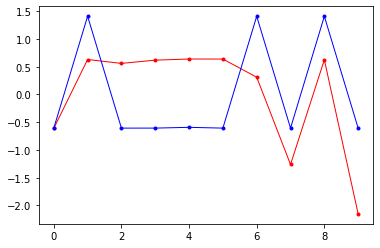

0.47941766586571877

In [9]:
import matplotlib.pyplot as plt

x = range(0, 10)
y1 = test_data['political_probability']
y2 = WW1 * test_data['political'] - WW2 * test_data['not_political'] + bb

plt.plot(x, y1, color="r", linestyle="-", marker=".", linewidth=1.0)
plt.plot(x, y2, color="b", linestyle="-", marker=".", linewidth=1.0)

plt.show()

loss = 0
for k in range(10, 20):
    loss += np.square(y1[k]) - np.square(y2[k])

loss